In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [3]:
file = "data_players_2019.csv"
# load dataset into Pandas DataFrame

all = pd.read_csv(file)
all

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Fls,Fld.2,Off.1,PKwon,PKcon,OG.1,Recov,AerialWon,AerialLost,AerialWon%
0,1,Brenden Aaronson\Brenden-Aaronson,us USA,MFFW,Philadelphia,18,2000,28,25,1706,...,17,35,2,0,0,0,118,5,17,22.7
1,2,Saad Abdul-Salaam\Saad-Abdul-Salaam,us USA,DF,Seattle,27,1991,18,11,1067,...,12,9,1,0,0,0,83,25,17,59.5
2,3,Lalas Abubakar\Lalas-Abubakar,gh GHA,DF,Columbus,24,1994,1,1,90,...,0,0,0,0,0,0,12,4,1,80.0
3,4,Lalas Abubakar\Lalas-Abubakar,gh GHA,DF,Colorado,24,1994,22,22,1980,...,27,10,2,0,4,1,175,35,30,53.8
4,5,David Accam\David-Accam,gh GHA,FWMF,Columbus,28,1990,15,8,667,...,18,10,4,0,0,0,41,6,5,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,642,Adrian Zendejas\Adrian-Zendejas,mx MEX,GK,Sporting KC,23,1995,1,1,90,...,0,0,0,0,0,0,9,0,0,NaN
642,643,Reto Ziegler\Reto-Ziegler,ch SUI,DF,FC Dallas,33,1986,32,32,2880,...,34,11,4,0,0,0,250,37,28,56.9
643,644,Walker Zimmerman\Walker-Zimmerman,us USA,DF,Los Angeles FC,25,1993,25,25,2165,...,31,13,1,0,1,0,300,90,42,68.2
644,645,Ethan Zubak\Ethan-Zubak,us USA,MFFW,LA Galaxy,20,1998,3,0,43,...,1,0,0,0,0,0,2,2,1,66.7


In [18]:
players = all[all.Min > 1000]
players = players.reset_index()
player_names = pd.DataFrame(players['Player'])
# players = players.drop(['Player','Rk','Nation', 'Pos', 'Age', 'Born', 'MP', 'Starts', 'Min', 'Squad'], axis=1)
players = pd.DataFrame(players[["Gls", "Ast", "PK", "PKatt", "CrdY", "CrdR", "Gls", "Ast", "G+A", "G-PK", "G+A-PK", "xG", "npxG", "xA", "xG", "xA", "xG+xA", "npxG", "npxG+xA", "TotAtt","TotCmp%","TotDist","PrgDist","SbortCmp","ShortAtt","ShortCmp%","MedCmp","MedAtt","MedCmp%","LongCmp","LongAtt","LongCmp%","Att","Tkl%","Past","Press","Succ","Carries","TotDist","PrgDist", "AerialLost", "AerialWon%"]])
players.reset_index(drop=True)
players.head()

,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls,Ast,G+A,G-PK,...,Att,Tkl%,Past,Press,Succ,Carries,TotDist,PrgDist,AerialLost,AerialWon%
0,3,1,0,0,3,0,3,1,0.21,0.16,...,58,22.4,45,130,145,679,7391,1578,17,22.7
1,0,0,0,0,2,0,0,0,0.00,0.00,...,16,25.0,12,83,26,390,8699,3225,17,59.5
2,0,0,0,0,7,0,0,0,0.00,0.00,...,21,47.6,11,69,77,503,13322,5222,30,53.8
3,2,1,0,0,12,0,2,1,0.13,0.09,...,33,21.2,26,252,123,1377,31718,8013,13,67.5
4,2,1,0,0,10,1,2,1,0.10,0.07,...,60,28.3,43,171,143,892,15206,4609,30,33.3


In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(players.values)
players.shape

(342, 42)

In [20]:
sklearn_pca = PCA(n_components=2)

In [21]:
players_values = np.nan_to_num(players)
reduced_data = sklearn_pca.fit_transform(players_values)

In [22]:
print(players.shape)
print(reduced_data.shape)
# reduced_data

(342, 42)
(342, 2)


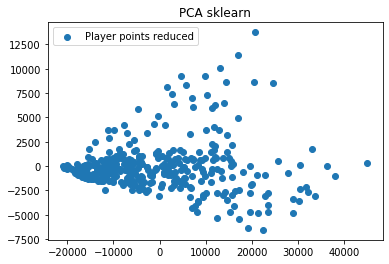

In [23]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Player points reduced')
plt.title("PCA sklearn")
plt.legend()
plt.show()

[[-5.71557509e+03 -1.81655146e+02]
 [ 1.31110948e+04  1.64232128e+02]
 [-1.13420253e+04 -6.87771109e+01]
 [ 6.91665217e+03 -1.10930079e+03]
 [ 3.28261826e+04 -1.65878473e+03]
 [-1.70127922e+04 -3.71083488e+02]
 [ 9.37135037e+02  1.11387768e+01]
 [ 6.82716965e+03  7.07386884e+03]
 [ 2.02264680e+04 -3.09642299e+03]
 [ 1.76438877e+04  9.05231437e+03]]
[2. 2. 0. 8. 6. 6. 3. 6. 2. 5. 8. 5. 2. 2. 0. 2. 2. 5. 0. 0. 8. 5. 4. 3.
 0. 5. 2. 3. 0. 5. 2. 3. 3. 6. 3. 8. 9. 1. 6. 7. 1. 3. 5. 6. 4. 0. 1. 0.
 5. 7. 6. 6. 6. 2. 1. 1. 3. 6. 3. 0. 2. 5. 0. 8. 8. 6. 7. 0. 1. 7. 2. 5.
 6. 9. 3. 6. 0. 2. 0. 8. 1. 1. 0. 5. 4. 2. 2. 5. 2. 5. 8. 3. 1. 6. 3. 2.
 0. 2. 7. 2. 2. 6. 5. 5. 5. 0. 2. 1. 5. 0. 0. 9. 1. 0. 3. 2. 8. 3. 6. 1.
 4. 2. 1. 0. 8. 3. 1. 9. 0. 6. 7. 3. 5. 4. 6. 1. 0. 5. 1. 7. 0. 2. 2. 0.
 2. 8. 6. 6. 0. 5. 9. 0. 5. 3. 4. 6. 0. 2. 6. 1. 0. 8. 1. 0. 3. 6. 2. 0.
 2. 2. 2. 3. 0. 0. 3. 8. 0. 0. 3. 2. 0. 3. 6. 2. 5. 9. 2. 2. 6. 3. 5. 3.
 8. 2. 4. 7. 3. 1. 2. 1. 2. 0. 0. 7. 2. 3. 2. 0. 2. 1. 1. 1. 2. 6

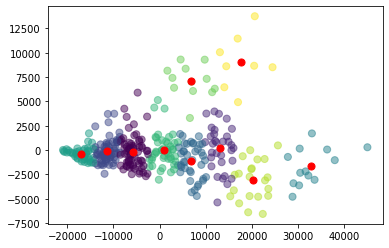

In [24]:
df = pd.DataFrame(reduced_data,columns=['x','y'])

kmeans = KMeans(n_clusters=10).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
print( kmeans.labels_.astype(float))

plt.scatter(df['x'], df['y'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


In [27]:
clusters = pd.DataFrame(kmeans.labels_)
player_names["cluster"] = clusters
player_names["x"] = df['x']
player_names["y"] = df['y']
player_names.to_csv("groupings_outfield_2019.csv")